In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combined = [train, test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Drop PassangerId & Ticket & Cabin
train = train.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
test = test.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
combined = [train, test]

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


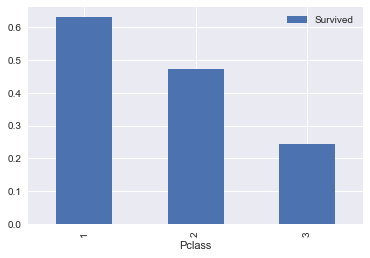

In [6]:
# Pclass
pclass = train[["Pclass", "Survived"]].groupby(["Pclass"]).mean()
pclass.plot(kind="bar")

In [7]:
# Name & Title
for i in combined:
    i["Title"] = i.Name.str.extract("([A-Za-z]+)\.", expand=False)
pd.crosstab(train["Title"], train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


C:\Users\Weiming\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


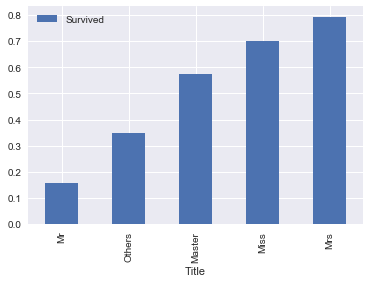

In [8]:
# Get Title
for i in combined:
    i["Title"] = i["Title"].replace("Mlle", "Miss")
    i["Title"] = i["Title"].replace("Ms", "Miss")
    i["Title"] = i["Title"].replace("Mme", "Mrs")
types = ["Miss", "Mrs", "Mr", "Master"]
for i in combined:
    for j in range(0, len(i)):
        if (i["Title"][j] not in types):
            i["Title"][j] = "Others"
title = train[["Title", "Survived"]].groupby(["Title"]).mean().sort_values(by="Survived")
title.plot(kind="bar")

# Drop Name
train = train.drop(["Name"], axis=1)
test = test.drop(["Name"], axis=1)
combined = [train, test]
for i in combined:
    i["Title"] = i["Title"].map({"Mrs": 0, "Miss": 1, "Mr": 2, "Master": 3, "Others": 4})

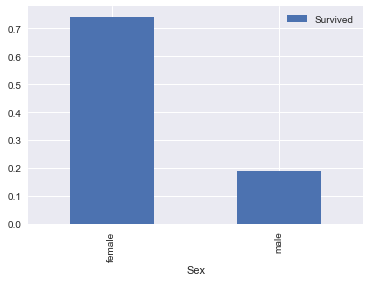

In [9]:
# Sex
sex = train[["Sex", "Survived"]].groupby(["Sex"]).mean()
sex.plot(kind="bar")
for i in combined:
    i["Sex"] = i["Sex"].map({"male": 1, "female": 0})

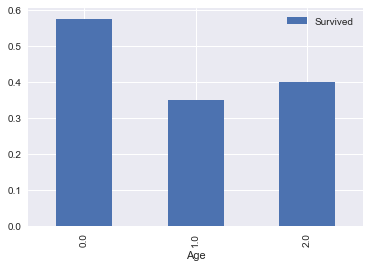

In [10]:
# Age
train["Age"].fillna(train["Age"].dropna().median(), inplace=True)
for i in combined:    
    i.loc[i["Age"] < 15, "Age"] = 0
    i.loc[(i["Age"] >= 15) & (i["Age"] < 35), "Age"] = 1
    i.loc[i["Age"] >= 35, "Age"] = 2
age = train[["Age", "Survived"]].groupby(["Age"]).mean()
age.plot(kind="bar")

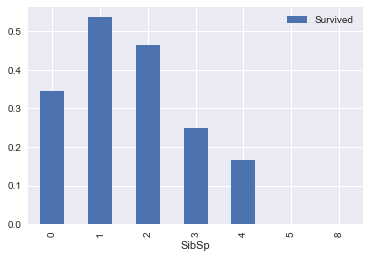

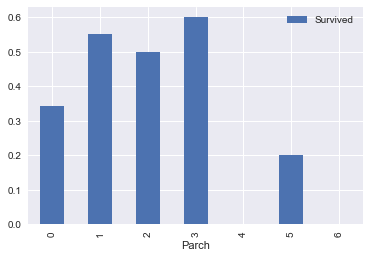

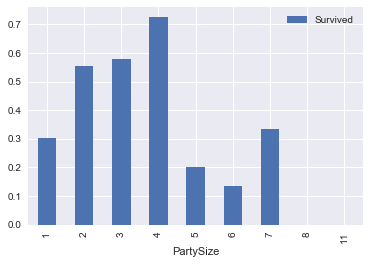

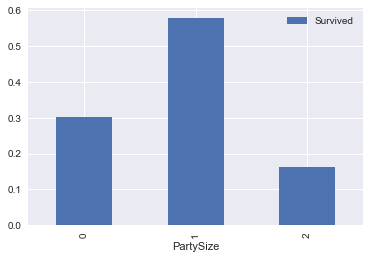

In [12]:
# SibSp & Parch
sibsp = train[["SibSp", "Survived"]].groupby(["SibSp"]).mean()
sibsp.plot(kind="bar")
parch = train[["Parch", "Survived"]].groupby(["Parch"]).mean()
parch.plot(kind="bar")

for i in combined:
    i["PartySize"] = i["SibSp"] + i["Parch"] + 1
    
partySize = train[["PartySize", "Survived"]].groupby(["PartySize"]).mean()
partySize.plot(kind="bar")

for i in combined:
    i.loc[i["PartySize"] == 1, "PartySize"] = 0
    i.loc[(i["PartySize"] > 1) & (i["PartySize"] <= 4), "PartySize"] = 1
    i.loc[i["PartySize"] > 4, "PartySize"] = 2

alone = train[["PartySize", "Survived"]].groupby(["PartySize"]).mean()
alone.plot(kind="bar")

train = train.drop(["Parch", "SibSp"], axis=1)
test = test.drop(["Parch", "SibSp"], axis=1)
combined = [train, test]

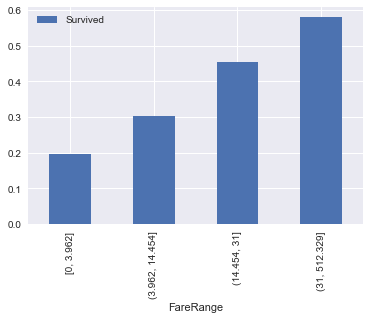

In [14]:
# Fare
for i in combined:
    i["Fare"] = i["Fare"].fillna(i["Fare"].dropna().mode()[0])
train["FareRange"] = pd.qcut(train["Fare"], 4)
fare = train[["FareRange", "Survived"]].groupby(["FareRange"]).mean()
fare.plot(kind="bar")

for i in combined:
    i.loc[i["Fare"] <= 7.91, "Fare"] = 0
    i.loc[(i["Fare"] > 7.91) & (i["Fare"] <= 14.454), "Fare"] = 1
    i.loc[(i["Fare"] > 14.454) & (i["Fare"] <= 31), "Fare"] = 2
    i.loc[i["Fare"] > 31, "Fare"] = 3

train = train.drop(["FareRange"], axis=1)
combined = [train, test]

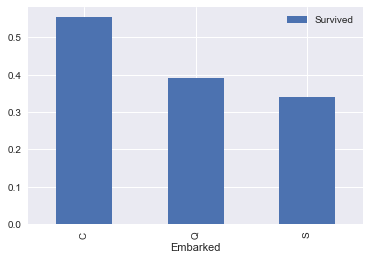

In [15]:
# Embarked
for i in combined:
    i["Embarked"] = i["Embarked"].fillna(i["Embarked"].dropna().mode()[0])
embarked = train[["Embarked", "Survived"]].groupby(["Embarked"]).mean()
embarked.plot(kind="bar")
for i in combined:
    i["Embarked"] = i["Embarked"].map({"C": 0, "Q": 1, "S": 2}).astype(int)

In [16]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,PartySize
0,0,3,1,1.0,0.0,2,2,1
1,1,1,0,2.0,3.0,0,0,1
2,1,3,0,1.0,1.0,2,1,0
3,1,1,0,2.0,3.0,2,0,1
4,0,3,1,2.0,1.0,2,2,0


In [17]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,PartySize
0,3,1,1.0,0.0,1,2,0
1,3,0,2.0,0.0,2,0,1
2,2,1,2.0,1.0,1,2,0
3,3,1,1.0,1.0,2,2,0
4,3,0,1.0,1.0,2,0,1
